In [142]:
import uproot
import matplotlib.pyplot as plt
import awkward
import uproot_methods
import numpy as np
import seaborn as sns

# Lab 5: Intro to ATLAS Data, Part 2 - Kyle Pitz

### Lorentz 4-Vectors
Lorentz 4-Vectors are a special type of vector designed with special relativity in mind. As the name suggests, it is a vector with four components, the first being the "time-like" component, and the last three being the "space-like" components. The quantities within the vector can describe different things, such as position for a 4-position vector, momentum in a 4-momentum vector, etc. One of the important aspects of Lorentz 4-vectors is that they transform according to the Lorentz transformation, which describes a transformation from one frame of reference to another moving at a constant velocity relative to the home reference frame. 

### Invariant Mass
In relation to Lorentz 4-vectors, one quantity that is invariant under transformation to any frame of reference is the invariant mass. Also called rest mass, the invariant mass is the mass of an object as observed from its zero-momentum reference frame. The invariant mass can be found from the energy-momentum relation, which relates the relativistic energy of a particle to its rest mass and momentum. Because the rest mass is an intrinsic quantity of the matter being studied, it is an important quantity to know and understand in physics.

In this lab, we will be forming Lorentz 4-momentum vectors of leptons from ATLAS data, and finding the magnitude of the sum of two of these vectors. Conveniently, 4-momentum vectors are "designed" to house the information of invariant mass in the magnitude of the vector, and addition of two vectors is simple.

In [19]:
mc_sim = uproot.lazyarrays('mc_147770.Zee.root', b'mini;1')

In [38]:
# Filter the data

mc1 = mc_sim[mc_sim.lep_n == 2]
mc2 = mc1[mc1.lep_charge[:,0] != mc1.lep_charge[:,1]]
mc3 = mc2[mc2.lep_type[:,0] == mc2.lep_type[:,1]]

lim = mc3[:100000] # full dataset too large to do in reasonable time, limit to first 100000 rows

In [40]:
# Form 4-momentums and calculate invariant mass

masses = np.zeros(len(lim))

for i in range(len(lim)):
    lead = uproot_methods.TLorentzVector.from_ptetaphie(lim.lep_pt[i,0]/1000., lim.lep_eta[i,0], lim.lep_phi[i,0], lim.lep_E[i,0]/1000.)
    tail = uproot_methods.TLorentzVector.from_ptetaphie(lim.lep_pt[i,1]/1000., lim.lep_eta[i,1], lim.lep_phi[i,1], lim.lep_E[i,1]/1000.)
    inv_mass = lead + tail
    masses[i] = inv_mass.mag

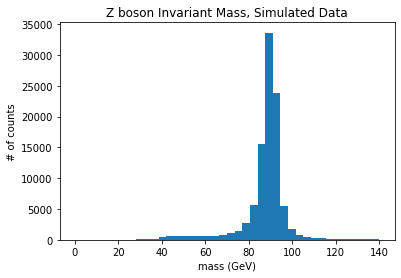

In [172]:
fig = plt.hist(masses, bins = 40, range = (0,140))
title = plt.title('Z boson Invariant Mass, Simulated Data')
xlabel = plt.xlabel('mass (GeV)')
ylabel = plt.ylabel('# of counts')

Now to use some real data, which was found at http://opendata.atlas.cern/release/samples/Data/.

Something to note about this dataset vs. the simulated data previously: after filtering the data to only have the desired events, the simulated data has only lep_type = 11, while the real data has only lep_type = 13. I couldn't find online what type of lepton each number represents, but the two datasets have different lepton types.

In [121]:
mu = uproot.lazyarrays('DataMuons.root', b'mini;1')

In [125]:
# Filter the data

mu1 = mu[mu.lep_n == 2]
mu2 = mu1[mu1.lep_charge[:,0] != mu1.lep_charge[:,1]]
mu3 = mu2[mu2.lep_type[:,0] == mu2.lep_type[:,1]]

lim_mu = mu3[:100000] # Again, I am limiting data length to speed up the mass calculation

In [129]:
# Forming 4-momentum and calculating mass

masses_mu = np.zeros(len(lim_mu))

for i in range(len(lim_mu)):
    lead = uproot_methods.TLorentzVector.from_ptetaphie(lim_mu.lep_pt[i,0]/1000., lim_mu.lep_eta[i,0], lim_mu.lep_phi[i,0], lim_mu.lep_E[i,0]/1000.)
    tail = uproot_methods.TLorentzVector.from_ptetaphie(lim_mu.lep_pt[i,1]/1000., lim_mu.lep_eta[i,1], lim_mu.lep_phi[i,1], lim_mu.lep_E[i,1]/1000.)
    inv_mass = lead + tail
    masses_mu[i] = inv_mass.mag

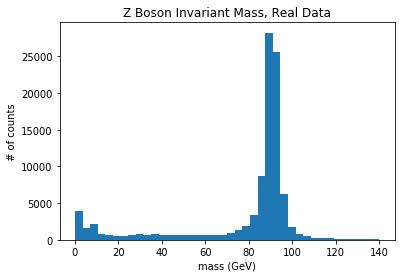

In [173]:
# Plotting data in histogram

fig = plt.hist(masses_mu, bins = 40, range = (0,140))
title = plt.title('Z Boson Invariant Mass, Real Data')
xlabel = plt.xlabel('mass (GeV)')
ylabel = plt.ylabel('# of counts')

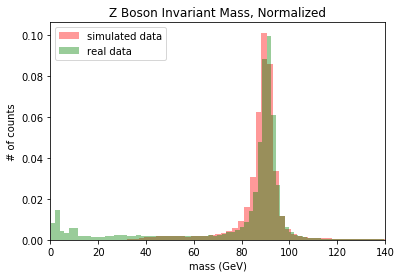

In [195]:
# Plotting both simulated and real data together

fig1 = sns.distplot(masses, bins = 400, color="red", label='simulated data', kde = False, norm_hist = True)
fig2 = sns.distplot(masses_mu, bins = 400, color="green", label='real data', kde=False, norm_hist = True)
xlim = plt.xlim(0,140)
legend = plt.legend(loc='upper left')
title = plt.title('Z Boson Invariant Mass, Normalized')
xlabel = plt.xlabel('mass (GeV)')
ylabel = plt.ylabel('# of counts')

We can see a similar peak at ~90 GeV, but the real data has more counts tailing towards zero, and noticably a small grouping of masses <10 GeV. One possible explanation for this is that some events in the real data were events that didn't include a Z boson but still involved two leptons of opposite charge and the same type. This wouldn't require the two leptons created to have come from a 90 GeV particle like the Z boson, but could have formed through other means that resulted in lower energies of the daughter lepton pairs. 